In [36]:
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# function to pick n random points in a cylinder
def random_points_in_cylinder(n, radius, height):
    """
    Generate random points within a cylinder.

    Parameters:
    n (int): Number of random points to generate.
    radius (float): Radius of the cylinder.
    height (float): Height of the cylinder.

    Returns:
    numpy.ndarray: An array of shape (n, 3) containing the random points.
                   Each point is represented by its (x, y, z) coordinates.
    """
    rs = radius * np.sqrt(np.random.rand(n))
    thetas = 2 * np.pi * np.random.rand(n)
    zs = height * np.random.rand(n)
    return np.column_stack((rs * np.cos(thetas), rs * np.sin(thetas), zs))

In [3]:
radius = 5
height = 10
n = 2
points = random_points_in_cylinder(n, radius, height)
print(f"Random points in cylinder with radius {radius} and height {height}: {points}")

Random points in cylinder with radius 5 and height 10: [[-2.20430041 -2.27181838  0.59465345]
 [-0.24067051 -0.87098103  9.89200484]]


# concentration functions

In [4]:
def box_char_func_np(x, x0, x1, y0, y1, z0, z1):
    """
    Determines if points in a NumPy array are within a specified 3D box.

    Parameters:
    x (np.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    x0 (float): The minimum x-coordinate of the box.
    x1 (float): The maximum x-coordinate of the box.
    y0 (float): The minimum y-coordinate of the box.
    y1 (float): The maximum y-coordinate of the box.
    z0 (float): The minimum z-coordinate of the box.
    z1 (float): The maximum z-coordinate of the box.

    Returns:
    np.ndarray: A 1D boolean array of length n where each element is True if the corresponding point is within the box, and False otherwise.
    """
    return np.logical_and.reduce((x[:, 0] >= x0, x[:, 0] <= x1, x[:, 1] >= y0, x[:, 1] <= y1, x[:, 2] >= z0, x[:, 2] <= z1))


In [5]:
def unif_concentration(x, a):
    """
    Generates a uniform concentration array.

    Parameters:
    x (numpy.ndarray): An array whose shape will be used to determine the size of the output array.
    a (float): The value to fill the output array with.

    Returns:
    numpy.ndarray: An array of the same length as the first dimension of `x`, filled with the value `a`.
    """
    return np.full(x.shape[0], a)

In [6]:
def clip(x, min_val, max_val):
    """
    Clips (limits) the values in an array.

    Parameters:
    x (numpy.ndarray): The array to clip.
    min_val (float): The minimum value to allow in the array.
    max_val (float): The maximum value to allow in the array.

    Returns:
    numpy.ndarray: A new array clipped so that all values are between `min_val` and `max_val`.
    """
    return np.clip(x, min_val, max_val)

In [7]:
def vertical_linear_gradient_dist(x, z_0, z_1, c_0, c_1):
    """
    Generates a linear gradient in the vertical direction.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    z_0 (float): The minimum z-coordinate of the gradient.
    z_1 (float): The maximum z-coordinate of the gradient.
    c_0 (float): The value of the gradient at z=z_0.
    c_1 (float): The value of the gradient at z=z_1.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    _ = c_0 + (c_1 - c_0) * (x[:, 2] - z_0) / (z_1 - z_0)
    return np.clip(_, c_0, c_1)

In [8]:
def radial_linear_gradient_dist(x, r_0, r_1, c_0, c_1):
    """
    Generates a linear gradient in the radial direction.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    r_0 (float): The minimum radial distance of the gradient.
    r_1 (float): The maximum radial distance of the gradient.
    c_0 (float): The value of the gradient at r=r_0.
    c_1 (float): The value of the gradient at r=r_1.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    r = np.linalg.norm(x[:, :2], axis=1)
    _ = c_0 + (c_1 - c_0) * (r - r_0) / (r_1 - r_0)
    return np.clip(_, c_0, c_1)

In [9]:
vertical_linear_gradient_dist(points, 0, 10, 0, 1)

array([0.05946534, 0.98920048])

In [10]:
def shperical_gradient_dist(x, r_0, r_1, z_0, z_1, c_0, c_1):
    """
    Generates a spherical gradient in the radial direction.

    Parameters:
    x (numpy.ndarray): A 2D NumPy array of shape (n, 3) where each row represents a point in 3D space.
    r_0 (float): The minimum radial distance of the gradient.
    r_1 (float): The maximum radial distance of the gradient.
    z_0 (float): The minimum z-coordinate of the gradient.
    z_1 (float): The maximum z-coordinate of the gradient.
    c_0 (float): The value of the gradient at r=r_0, z=z_0.
    c_1 (float): The value of the gradient at r=r_1, z=z_1.

    Returns:
    numpy.ndarray: An array of length n with the gradient values.
    """
    r = np.linalg.norm(x[:, :2], axis=1)
    z = x[:, 2]
    _ = c_0 + (c_1 - c_0) * (r - r_0) / (r_1 - r_0) * (z - z_0) / (z_1 - z_0)
    return np.clip(_, c_0, c_1)

Step 1: Define the field and core spots

In [11]:
soil_conc_a = .1

soil_x0 = -1
soil_x1 = 1
soil_y0 = -1
soil_y1 = 1
soil_z0 = -2
soil_z1 = 0

In [12]:
_n = 4
_x = np.linspace(soil_x0, soil_x1, _n+2)[1:-1]
_y = np.linspace(soil_y0, soil_y1, _n+2)[1:-1]
_xx, _yy = np.meshgrid(_x, _y)
_xx = _xx.flatten()
_yy = _yy.flatten()
_z = np.zeros(len(_xx))
core_locs = np.column_stack((_xx, _yy, _z))

core_height = 1
core_radius = .05

# Slice inspection

In [32]:
def xy_slice_inspect(conc_func, x0, x1, y0, y1, z=0, n=100):
    """
    Generate and graph a vertical slice of a 3D function.

    Parameters:
    x0 (float): The minimum x-coordinate of the slice.
    x1 (float): The maximum x-coordinate of the slice.
    y0 (float): The minimum y-coordinate of the slice.
    y1 (float): The maximum y-coordinate of the slice.
    z (float): The z-coordinate of the slice.
    n (int): The number of points to sample in the x and y directions.

    Returns:
    numpy.ndarray: A 2D array of shape (n, n) where each element is the value of the function at that point in the slice.
    """

    x = np.linspace(x0, x1, n)
    y = np.linspace(y0, y1, n)
    xx, yy = np.meshgrid(x, y)
    zz = np.full_like(xx, z)
    points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
    conc = conc_func(points)
    conc = conc.reshape(n, n)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.contourf(xx, yy, conc, levels=20, cmap='viridis', alpha=0.5)
    plt.colorbar()

    ax.set_xlim(x0, x1)
    ax.set_ylim(y0, y1)
    ax.set_aspect('equal')
    plt.show()

    return conc

In [33]:
def xz_slice_inspect(conc_func, x0, x1, z0, z1, y=.5, n=100):
    """
    Generate and graph a vertical slice of a 3D function.

    Parameters:
    x0 (float): The minimum x-coordinate of the slice.
    x1 (float): The maximum x-coordinate of the slice.
    z0 (float): The minimum z-coordinate of the slice.
    z1 (float): The maximum z-coordinate of the slice.
    y (float): The y-coordinate of the slice.
    n (int): The number of points to sample in the x and z directions.

    Returns:
    numpy.ndarray: A 2D array of shape (n, n) where each element is the value of the function at that point in the slice.
    """

    x = np.linspace(x0, x1, n)
    z = np.linspace(z0, z1, n)
    xx, zz = np.meshgrid(x, z)
    yy = np.full_like(xx, y)
    points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
    conc = conc_func(points)
    conc = conc.reshape(n, n)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.contourf(xx, zz, conc, levels=20, cmap='viridis', alpha=0.5)
    plt.colorbar()

    ax.set_xlim(x0, x1)
    ax.set_ylim(z0, z1)
    ax.set_aspect('equal')
    plt.show()

    return conc

In [34]:
def yz_slice_inspect(conc_func, y0, y1, z0, z1, x=.5, n=100):
    """
    Generate and graph a vertical slice of a 3D function.

    Parameters:
    y0 (float): The minimum y-coordinate of the slice.
    y1 (float): The maximum y-coordinate of the slice.
    z0 (float): The minimum z-coordinate of the slice.
    z1 (float): The maximum z-coordinate of the slice.
    x (float): The x-coordinate of the slice.
    n (int): The number of points to sample in the y and z directions.

    Returns:
    numpy.ndarray: A 2D array of shape (n, n) where each element is the value of the function at that point in the slice.
    """

    y = np.linspace(y0, y1, n)
    z = np.linspace(z0, z1, n)
    yy, zz = np.meshgrid(y, z)
    xx = np.full_like(yy, x)
    points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
    conc = conc_func(points)
    conc = conc.reshape(n, n)

    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.contourf(yy, zz, conc, levels=20, cmap='viridis', alpha=0.5)
    plt.colorbar()

    ax.set_xlim(y0, y1)
    ax.set_ylim(z0, z1)
    ax.set_aspect('equal')
    plt.show()

    return conc

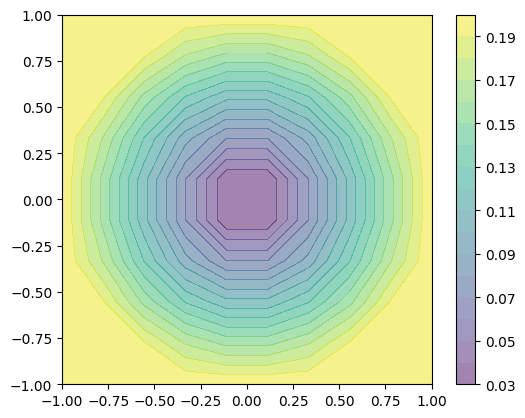

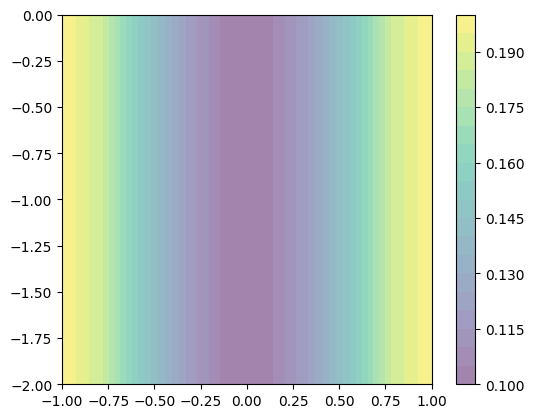

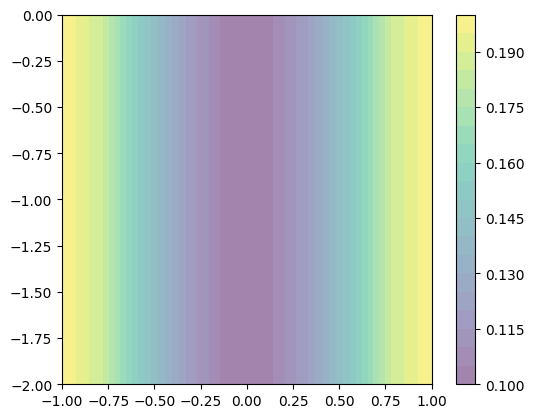

In [35]:
conc_func = lambda x: radial_linear_gradient_dist(x, 0, 1, 0, .2)
conc = xy_slice_inspect(conc_func, -1, 1, -1, 1, 0, 10)
conc = xz_slice_inspect(conc_func, -1, 1, -2, 0, .5, 10)
conc = yz_slice_inspect(conc_func, -1, 1, -2, 0, .5, 10)

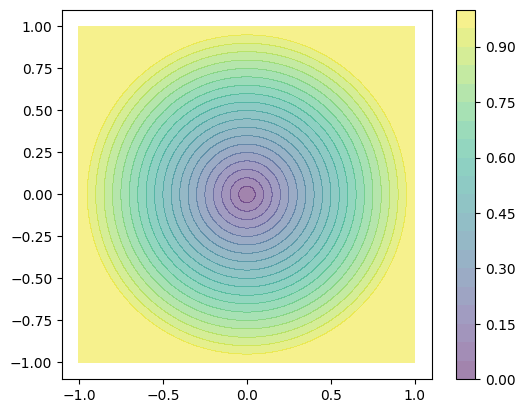

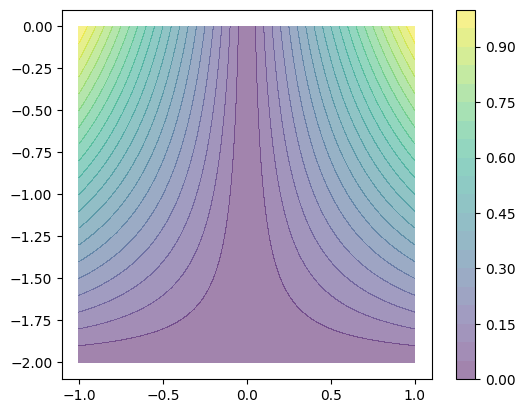

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111)
n = 100
x = np.linspace(soil_x0, soil_x1, n)
y = np.linspace(soil_y0, soil_y1, n)
xx, yy = np.meshgrid(x, y)
zz = np.zeros_like(xx)
points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
conc = shperical_gradient_dist(points, 0, 1, soil_z0, soil_z1, 0, 1)
conc = conc.reshape(n, n)

plt.contourf(xx, yy, conc, levels=20, cmap='viridis', alpha=0.5)
plt.colorbar()

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')
plt.show()

# show a vertical slice
fig = plt.figure()
ax = fig.add_subplot(111)
n = 100
x = np.linspace(soil_x0, soil_x1, n)
z = np.linspace(soil_z0, soil_z1, n)

xx, zz = np.meshgrid(x, z)
yy = np.zeros_like(xx)
points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
conc = shperical_gradient_dist(points, 0, 1, soil_z0, soil_z1, 0, 1)
conc = conc.reshape(n, n)

plt.contourf(xx, zz, conc, levels=20, cmap='viridis', alpha=0.5)
plt.colorbar()

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-2.1, 0.1)
ax.set_aspect('equal')
plt.show()

In [15]:
core_height = 1
core_radius = .05

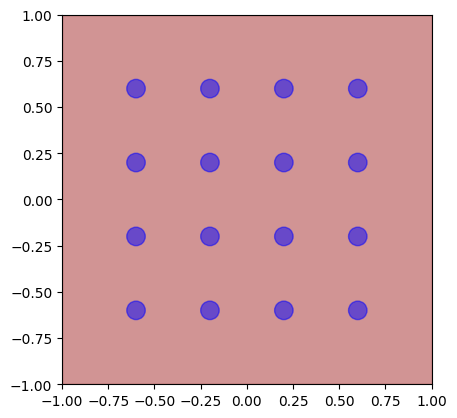

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.fill_between([soil_x0, soil_x1], soil_y0, soil_y1, color='brown', alpha=0.5)
for _x, _y in zip(_xx, _yy):
    circle = plt.Circle((_x, _y), core_radius, color='blue', alpha=0.5)
    ax.add_artist(circle)
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_aspect('equal')
plt.show()

In [17]:
# at each core location, pick n random points in the core
n = 10
n_cores = len(core_locs)
core_points = np.zeros((n*len(core_locs), 3))
for i, loc in enumerate(core_locs):
    core_points[i*n:(i+1)*n] = random_points_in_cylinder(n, core_radius, -core_height) + loc

In [18]:
core_points_conc = soil_conc_func(core_points)

core_conc = np.zeros(n_cores)
for i in range(n_cores):
    core_conc[i] = np.mean(core_points_conc[i*n:(i+1)*n])

NameError: name 'soil_conc_func' is not defined

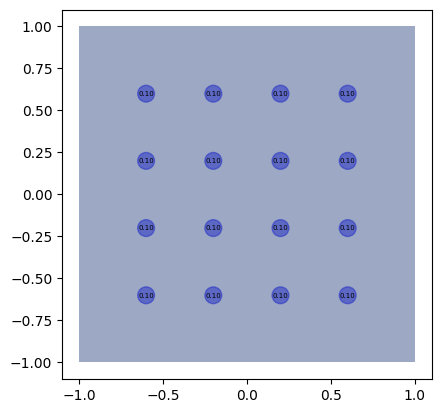

In [29]:

fig = plt.figure()
ax = fig.add_subplot(111)
for i, loc in enumerate(core_locs):
    circle = plt.Circle(loc[:2], core_radius, color='blue', alpha=0.5)
    ax.add_artist(circle)
    ax.text(loc[0], loc[1], f"{core_conc[i]:.2f}", ha='center', va='center', fontsize=5)

# plt.contourf(_xx, _yy, core_conc, levels=20, cmap='viridis', alpha=0.5)

n = 100
x = np.linspace(soil_x0, soil_x1, n)
y = np.linspace(soil_y0, soil_y1, n)
xx, yy = np.meshgrid(x, y)
zz = np.zeros_like(xx)
points = np.column_stack((xx.flatten(), yy.flatten(), zz.flatten()))
conc = soil_conc_func(points)
conc = conc.reshape(n, n)

plt.contourf(xx, yy, conc, levels=20, cmap='viridis', alpha=0.5)

ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1.1, 1.1)
ax.set_aspect('equal')

plt.show()
